In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import requests
#Source : https://stackoverflow.com/questions/17056209/python-pil-affine-transformation

In [2]:
url = 'https://images.pexels.com/photos/2850833/pexels-photo-2850833.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940'

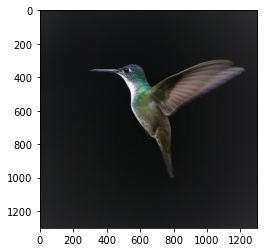

In [3]:
# Open image 
im = Image.open(requests.get(url, stream=True).raw)
#im = Image.open("../input/lineartransformationimages/pexels-cristina-andrea-alvarez-cruz-2850833.jpg")
plt.imshow(im)

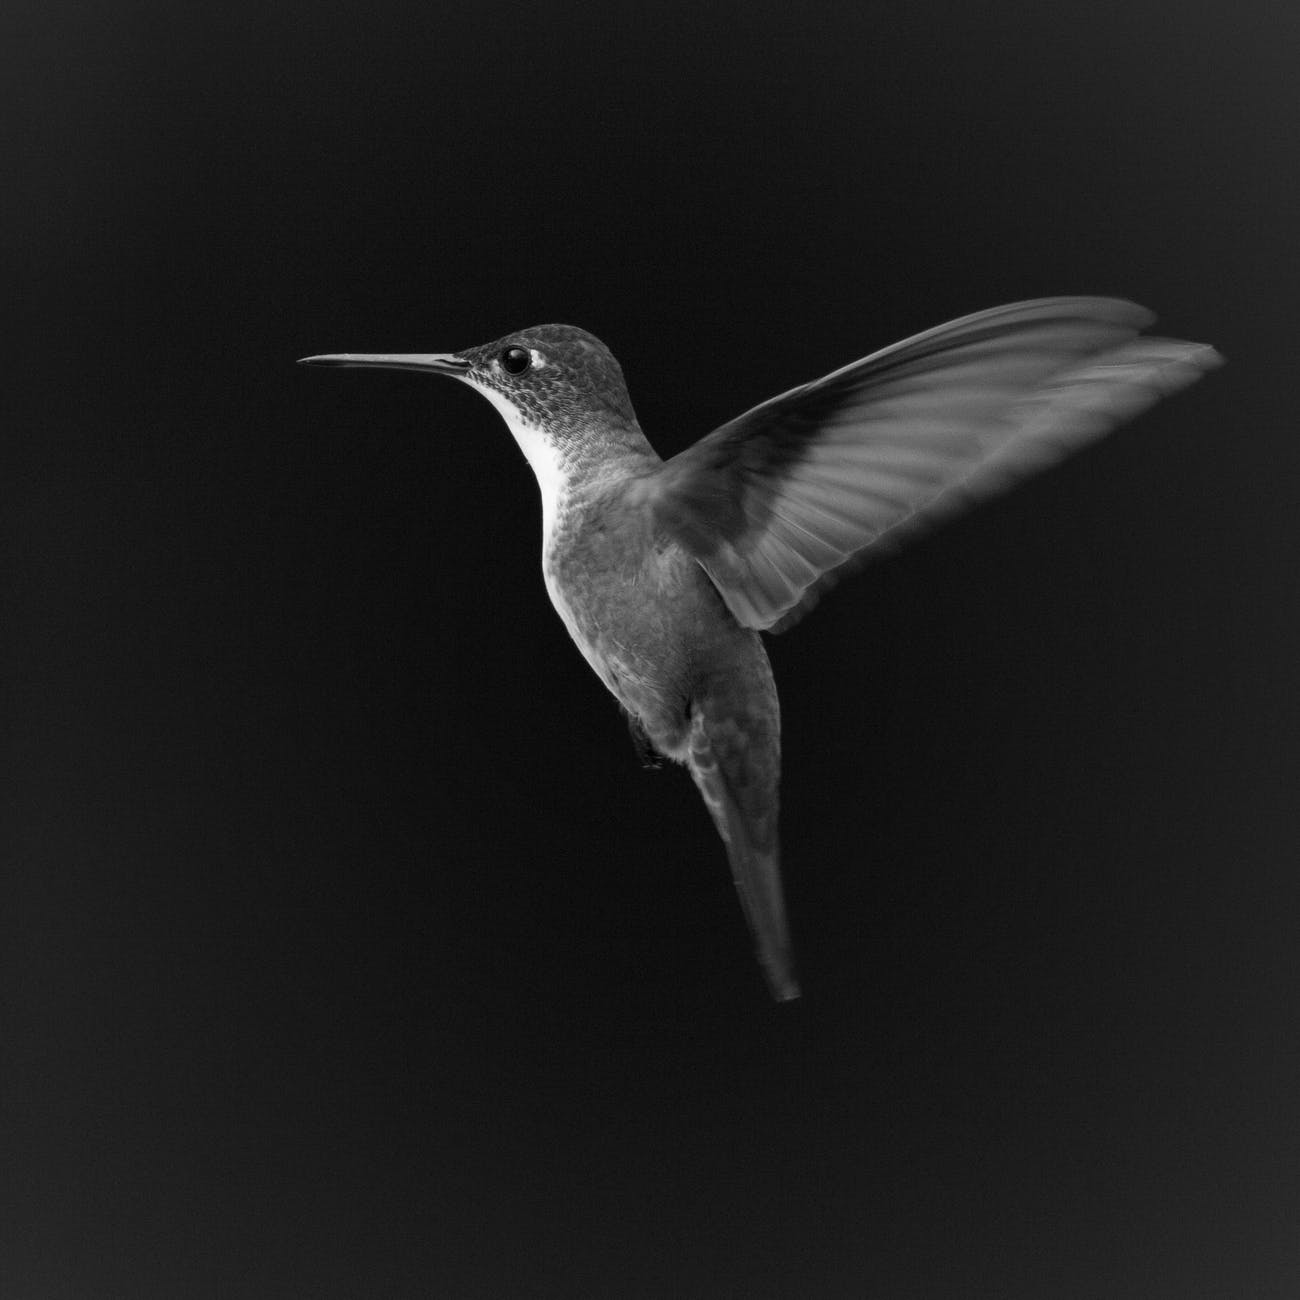

In [4]:
## Grayscale
im = im.convert('LA')
im

In [5]:
b, h = im.size
b, h

(1300, 1300)

In [6]:
def linear_transform(trans_mat, b_new = b, h_new = h):
    '''
    Effectively mulitplying each pixel vector by the transformation matrix
    PIL uses a tuple of 1st 2 rows of the inverse matrix
    '''
    Tinv = np.linalg.inv(trans_mat)
    Tinvtuple = (Tinv[0,0],Tinv[0,1], Tinv[0,2], Tinv[1,0],Tinv[1,1],Tinv[1,2])
    return im.transform((int(b_new), int(h_new)), Image.AFFINE, Tinvtuple, resample=Image.BILINEAR) 

Scaling the image to half the size

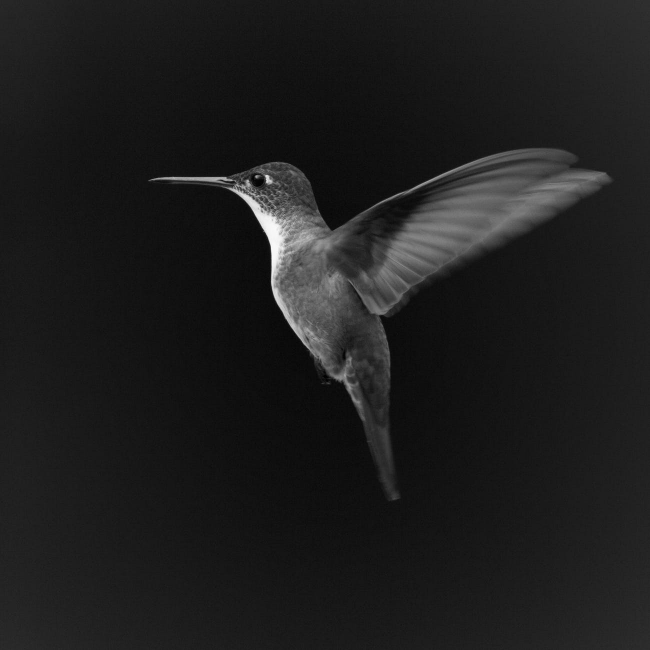

In [7]:
T = np.matrix([[1/2, 0, 0],
               [0, 1/2, 0],
               [0, 0, 1]])

trans = linear_transform(T, b/2, h/2)
trans

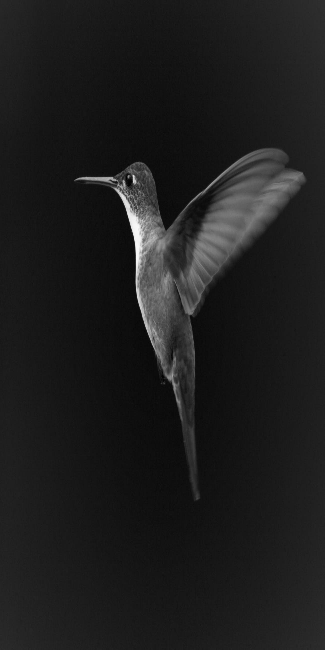

In [8]:
T = np.matrix([[1/4, 0, 0],
               [0, 1/2, 0],
               [0, 0, 1]])

trans = linear_transform(T, b/4, h/2)
trans

Rotation by 45 degree counter clockwise

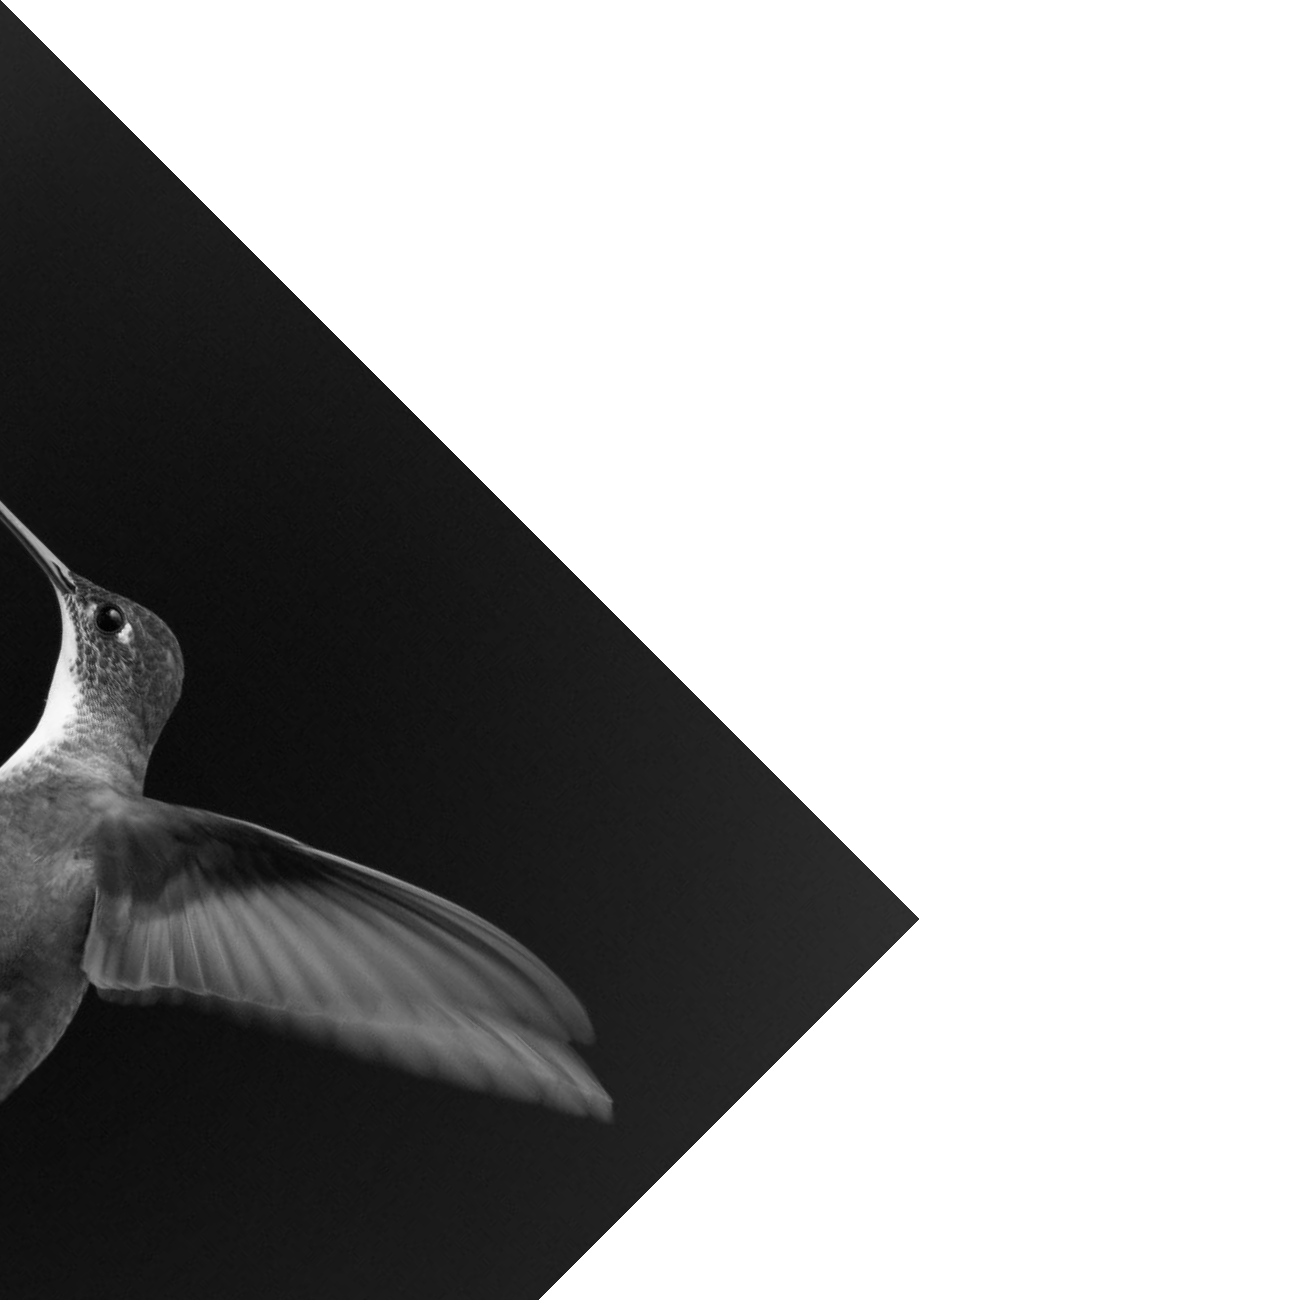

In [9]:
mat_rotate = (1/ np.sqrt(2)) * \
    np.matrix([[1, -1, 0],
               [1, 1, 0],
               [0, 0, np.sqrt(2)]])

trans = linear_transform(mat_rotate)
trans

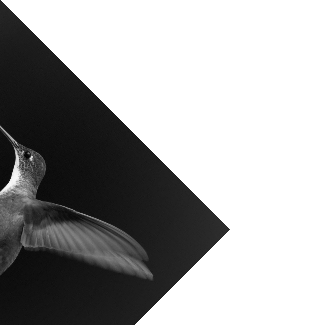

In [10]:

T = mat_rotate @ np.matrix(
    [[1/4, 0, 0],
     [0, 1/4, 0], 
     [0, 0, 1]])

linear_transform(T, b/4, h/4)

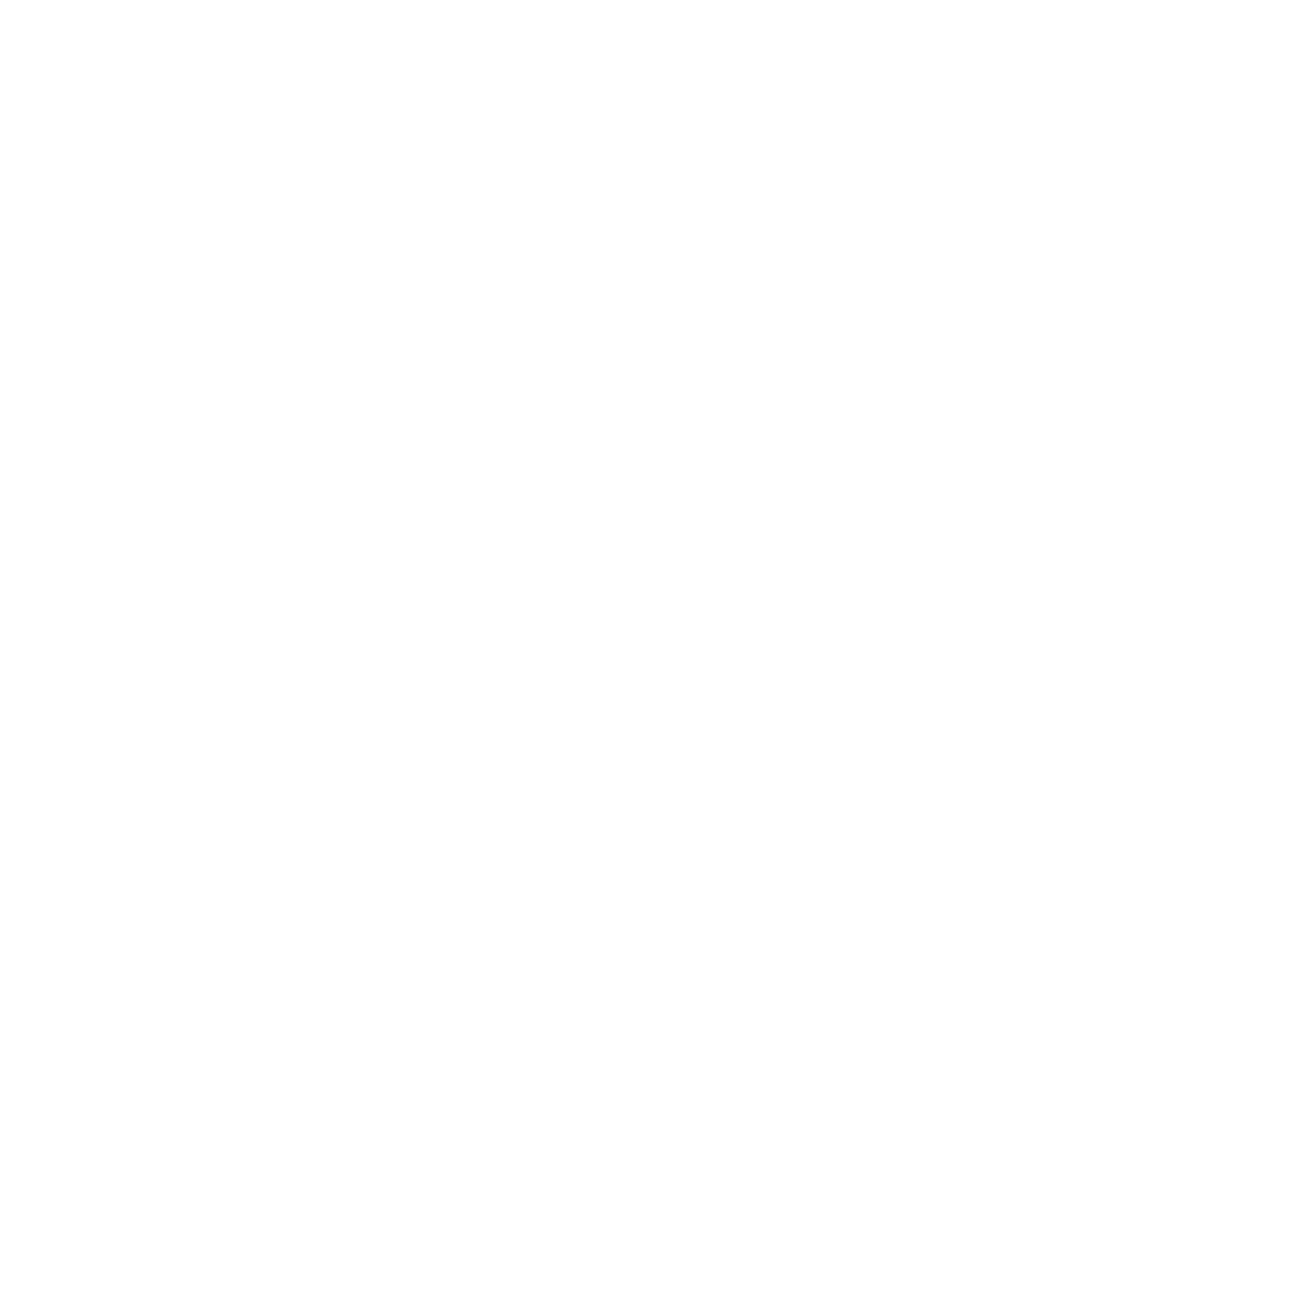

In [11]:
T = np.matrix(
    [[0, -1, 0],
     [1, 0, 0], 
     [0, 0, 1]]) @ np.matrix(
    [[1, 0, -b],
     [0, 1, h],
     [0, 0, 1]])

linear_transform(T, b, h)